In [141]:
#keeps the information about the experiment

import math

class data:
    const = 10000
    
    t = 0
    
    flux_real = 30
    flux_min = 0
    flux_max = 100
    flux_step = 0.1
    
    t_min = (math.pi / 2) / (const * (flux_max + flux_min) / 2)
    t_max = 360 * 10 ** (-9)
    
    n = round((flux_max - flux_min) / flux_step) + 1
    
    def __init__(self):
        data.t = data.t_min
                 
    def timestep(self):
        data.t *= 2

In [127]:
#returns the state 

import math
import numpy
numpy.random.seed(47)

def randbin(data, f):
    phi = data.const * f * data.t
    p_0 = (math.sin(phi / 2)) ** 2
    return numpy.random.choice([0,1], size=(1,1), p=[p_0, 1-p_0]).reshape(1)[0]

In [128]:
#returns the probability of the given state depending on the given flux 

import math

def pstate(data, x, f):
    if x == 0:
        return (math.sin(data.const * f * data.t / 2)) ** 2
    else:
        return (math.cos(data.const * f * data.t / 2)) ** 2

In [129]:
#the bayes theorem

def bayes(data, pres):
    
    h = randbin(data, data.flux_real)
    #normalization = 0

    for i in range(len(pres)):
        pres[i] = pres[i] * pstate(data, h, data.flux_min + i * data.flux_step)
        #normalization += pres[i]
    
    #for i in range(len(pres)):
        #pres[i] /= normalization

In [130]:
#fills arrays with a uniform distribution

def begin(data, array1, array2, array3):
    
    for i in range(data.n):
        array1.append(1 / data.n)
        array2.append(1 / data.n)
        array3.append(data.flux_min + i * data.flux_step)

In [131]:
#draws the function

import matplotlib.pyplot as plt

def draw1(data, array1, array2):
    
    plt.rcParams['figure.figsize'] = [10, 8]
    
    x = []
    for i in range(data.n):
        x.append(data.flux_min + i * data.flux_step)
    
    plt.plot(x, array1, 'o', color = 'b', label = 'final step')
    plt.plot(x, array2, 'o', color = 'r', label = 'initial')
    plt.grid(which='major', color='k', linewidth=1)
    plt.grid(which='minor', color='k', linestyle=':')
    plt.show()

In [132]:
#calculates the average 

import math

def avg(x, y):
    
    avg = 0
    normalization = 0
    
    for i in range(len(x)):
        avg += x[i] * y[i]
        normalization += x[i]
        
    return avg / normalization #average x

In [133]:
#calculates the standart deviation

import math

def stdev(x, y):
    
    average = avg(x, y) #average x
    
    sum = 0
    for i in range(len(x)):
        sum += (y[i] - average) ** 2  
        
    if sum == 0:
        return len(x) / 2 #if the function gets a uniform distribution, the standart deviation is a half of the interval
    else:
        return math.sqrt(sum / len(x)) #standart deviation of x

real flux is 22.802896845208256 +- 39.68226833249814 ( 174.02292613026873 %)
difference with the real flux is 23.990343849305816 %


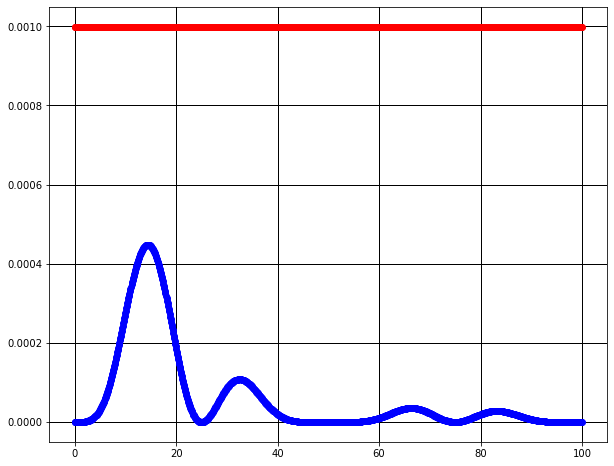

In [144]:
#main

import math

experiment = data()

present = []
initial = []
interval = []

begin(a, present, initial, interval)

#for i in range(int(math.log2(experiment.t_max / experiment.t_min))):
for i in range(4):
    bayes(experiment, present)
    experiment.timestep()

real = avg(present, interval)
abs_error = stdev(present, interval)

print('real flux is', real, '+-', abs_error, '(', abs_error / real * 100, '%)')

print('difference with the real flux is', (experiment.flux_real - real) / experiment.flux_real * 100, '%')

draw1(experiment, present, initial)